# Manually annotate raw data with weather conditions



Output : PolarizedDatabaseAnnotatedWeather.

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import trange
import skimage.io
import skimage.filters
import cv2
import time
from scipy.spatial.transform import Rotation as R


from tqdm import tqdm
from p_tqdm import p_map

import centroide_images
import ephemeride
import rayleigh

import csv

In [2]:
in_path="/scratch/lpoughon/PolarizedDatabase/"
calib_path="/scratch/lpoughon/PolarizedDatabase/calib/"
out_path="/scratch/lpoughon/PolarizedDatabaseProcessed/"
limit_Zenith_Angle=np.pi*0.5 #Limit Zenith Angle to crop circularly data inside of camera field-of-view.


In [3]:
dirs = os.listdir( in_path ) # Listing Files
dirs_files=[]
for file in dirs:
    if file[-7:]=='raw.npy': # Keeping only ones with ".npy" files. 
        dirs_files.append(file)
dirs_files.sort() #We sort the files in alphabetical order. 
# Since the format is YYYY-MM-DDTHH-mm-ss.npy, the files are sorted in chronological order.


In [4]:
print(dirs_files)

['2022-07-29_raw.npy', '2022-07-30_raw.npy', '2022-07-31_raw.npy', '2022-08-01_raw.npy', '2022-08-02_raw.npy', '2022-08-03_raw.npy', '2022-08-04_raw.npy', '2022-08-05_raw.npy', '2022-08-06_raw.npy', '2022-08-07_raw.npy', '2022-08-08_raw.npy', '2022-08-09_raw.npy', '2022-08-10_raw.npy', '2022-08-11_raw.npy', '2022-08-12_raw.npy', '2022-08-13_raw.npy', '2022-08-14_raw.npy', '2022-08-15_raw.npy', '2022-08-16_raw.npy', '2022-08-17_raw.npy', '2022-08-18_raw.npy', '2022-08-19_raw.npy', '2022-08-20_raw.npy', '2022-08-21_raw.npy', '2022-08-22_raw.npy', '2022-08-23_raw.npy', '2022-08-24_raw.npy', '2022-08-25_raw.npy', '2022-08-26_raw.npy', '2022-08-27_raw.npy', '2022-08-28_raw.npy', '2022-08-29_raw.npy']


In [5]:
#images=np.load(out_path+"2022_08_15_raw.npy")

### Load one image to have an example

In [6]:
print("File used :",in_path+dirs_files[1])
images_pola=np.load(in_path+dirs_files[1],allow_pickle=True)
images_pola.shape

File used : /scratch/lpoughon/PolarizedDatabase/2022-07-30_raw.npy


(571, 4)

[array([[ 16,  80,  48, ...,  16,  16,  16],
        [ 16,  16,  32, ...,  48,  16,  16],
        [ 32,  32,  16, ...,  48,  16,  16],
        ...,
        [ 80,  48,  16, ..., 224,  96,  80],
        [ 32,  32,  64, ...,  80,  80, 112],
        [ 16,  32,  16, ...,  80,  64,  80]], dtype=uint16) 2282.224
 '2022-07-30T19-20-19' 1]


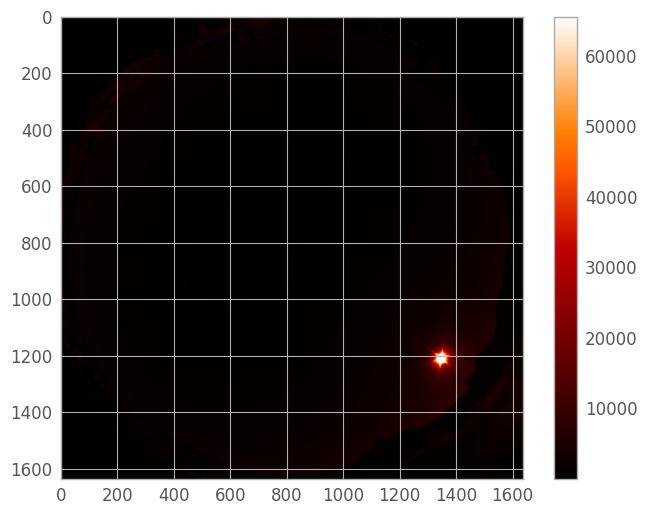

In [7]:
image_pola=images_pola[503]
print(image_pola)
plt.imshow(image_pola[0])
plt.colorbar()

In [8]:
theta=np.load(calib_path+"theta_crop.npy")
alpha=np.load(calib_path+"alpha_crop.npy")
f=float(np.load(calib_path+"f.npy"))
rot_mat=np.load(calib_path+"rot_mat.npy")
print(theta.shape)
print(alpha.shape)

(1636, 1636)
(1636, 1636)


### Generate a figure like the one in IEEE conference article :
#### https://ieeexplore.ieee.org/document/10325176
#### https://hal.science/hal-04267766

In [9]:
images=images_pola[:,0].shape

In [23]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix ipywidgets



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Traceback (most recent call last):
  File "/home/lpoughon/.localpython/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/home/lpoughon/.localpython/lib/python3.9/site-packages/jupyter_core/application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/home/lpoughon/.localpython/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start()
  File "/home/lpoughon/.localpython/lib/python3.9/site-packages/notebook/nbextensions.py", line 972, in start
    super().start()
  File "/home/lpoughon/.localpython/lib/python3.9/site-packages/jupyter_core/application.py", line 266, in start
    self.subapp.sta

In [24]:
from IPython.display import display, clear_output
import ipywidgets as widgets

# Function to display and annotate images
def display_and_annotate(images, annotations):
    fig, ax = plt.subplots()
    plt.ion()  # Turn on interactive mode
    idx = 0

    output = widgets.Output()

    def on_key_event(event):
        nonlocal idx
        if idx < len(images):
            img = images[idx]
            annotation = annotations[idx] if idx < len(annotations) else None

            ax.imshow(img)
            plt.title(f"Image {idx + 1} - Annotation: {annotation}")

            with output:
                clear_output(wait=True)
                display(fig)

            annotations.append(event['key'])

            # Move to the next image
            idx += 1

    output.observe(on_key_event, names='data')

    display(output)
    plt.show()


# Example usage
# Assuming you have an array of images (image_array) and an empty array for annotations (annotations_array)
image_array = images_pola[:,0]  # Replace this with your image array
annotations_array = []

Output()

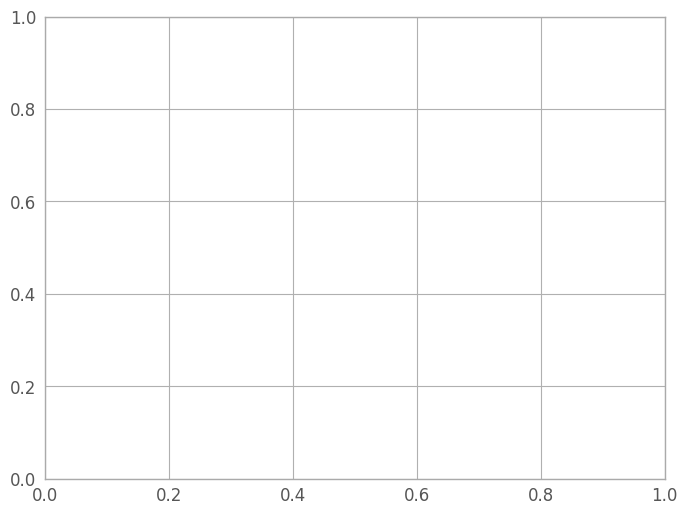

Annotations: []


In [25]:
display_and_annotate(image_array, annotations_array)

# After running this, annotations_array will contain the user annotations for each image
print("Annotations:", annotations_array)

In [ ]:
mafig.savefig("test_figure.png")

In [ ]:
mafig.show()

In [ ]:
np.seterr(divide='ignore', invalid='ignore')  # Ignore division by zero and invalid value warnings

### Calculation of AOP/DOP figure and values for each color, with Rayleigh simulation

In [ ]:
def AOP_DOP_process_save_and_figure(image_pola,save=True,sat_level=65500):
    verbose_text=False
    
    eph=ephemeride.ephemerides() #Initialization of the function used for calculating ephemerides.
    expo=image_pola[1] 
    chainetps=image_pola[2]
    type_image=image_pola[3]
    (Psi_sun,Theta_sun)=eph.getAltAzSoleil(chainetps) # Calculation of the ephemeris at the time of capture.
    (Ha_sun,Dec_sun)=eph.getHADecSoleil(chainetps)
    
    chaineheure=chainetps.split("T")[1].split("-")
    chainedate=chainetps.split('T')[0]
    heure_image=ephemeride.Time(chainetps.split("T")[0]+'T'+chaineheure[0]+":"+chaineheure[1]+":"+chaineheure[2])
    image=image_pola[0].astype('int64')
    
    chemin_enreg=out_path+chainedate+'/'
    if save:
        if not os.path.exists(chemin_enreg):
            try:
                os.mkdir(chemin_enreg)
            except Exception as e:print(e)
        #if os.path.exists(chemin_enreg+chainetps):return [None]
        if not os.path.exists(chemin_enreg+chainetps):
            try:
                os.mkdir(chemin_enreg+chainetps)
            except Exception as e:print(e)
        np.save(chemin_enreg+chainetps+"/image.npy",image)

    degre_sat=np.count_nonzero(image>=65520)/(image.shape[0]*image.shape[1])

    # Here we want to calculate the "average angle" seen at the center of a macropixel. 
    # We know the orientations of each sub-pixel (theta, alpha). However, a simple average 
    # does not work for finding the "central" orientation. For instance, the "average" between 
    # two 2D vectors with angles 45° and 315° would "actually" be 0°, but the arithmetic mean of
    # the two angles is 180°. Here, we encounter the same problem when transitioning from -π to π 
    # with numerical artifacts. To avoid this, we convert back to Cartesian coordinates and use atan2.    
            
    if verbose_text:print("Creation figure ...")
    fig,(ax0,ax2,ax3)=plt.subplots(3,4,figsize=(24,20),gridspec_kw={'width_ratios':[1.2,1.2,1.2,1.2]})
    plt.suptitle("Image : "+chainetps[:-1]+ " ~ Expo : "+str(expo)+" µs")
    
    
    if verbose_text:print("plot rgb image...")
    a=rebin(image,(image.shape[0]//2,image.shape[1]//2))
    imageRGB=(cv2.merge((a[0::2,1::2],0.5*(a[0::2,1::2]+a[1::2,0::2]),a[1::2,1::2]))/65520.0*255).astype('uint8')

    x, y = np.meshgrid(np.arange(imageRGB.shape[1] + 1), np.arange(imageRGB.shape[0] + 1))

    # Plot RGB image using pcolormesh
    pc = ax0[0].pcolormesh(x, y, imageRGB, edgecolors='k', linewidths=0.0)
    cbarrgb=fig.colorbar(pc,ax=ax0[1],shrink=0.9)
    ax0[0].set_aspect('equal')
    #ax2[0].imshow(cv2.cvtColor((imageRGB.astype('float32')/255.0).astype('uint8'), cv2.COLOR_BGR2RGB))
    #ax2[0].grid(False)        
    d=np.pi/180
    r = R.from_matrix(rot_mat)

            
    Sun_rot_cart=r.apply(np.array(sph2cart2(Psi_sun*d,Theta_sun*d)).T).T
    Sun_rot=np.array(cart2sph2(Sun_rot_cart[0],Sun_rot_cart[1],Sun_rot_cart[2])).T
            #Sun_rot[0] -> Psi, (az)
            #Sun_rot[1] -> Theta, zenith = 0 (anti-elev)
    if verbose_text:print("Psi_sun : "+str(Psi_sun*degrees)+" Theta_sun : "+str(Theta_sun*degrees))
    if verbose_text:print("Sun_rot[0] : "+str(Sun_rot[0])+" Sun_rot[1] : "+str(Sun_rot[1]))
    x_sol,y_sol=np.array([(x_0+f*np.sin(Sun_rot[0])*(Sun_rot[1]))/4]),np.array([(y_0-f*np.cos(Sun_rot[0])*(Sun_rot[1]))/4])
 
            
    ax0[0].set_title("RGB Image")                 

            
    if verbose_text:print("plot ephemeride...")
    eph.traceAzELSoleil(chainetps=chainetps,Ax=ax0[1])

    (Psi_sun,Theta_sun)=eph.getAltAzSoleil(chainetps)
                    

    for couleur in range(4):
        # Processing AOP and DOP for each color and saving it, and plot it

        #put a Nan Value on zones where at least one pixels of macropixel was saturated
        sat_zone=((image[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]>sat_level) | 
                  (image[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]>sat_level) |
                  (image[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]>sat_level) |
                  (image[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]>sat_level))

        
        #AOP values calculation
        Q=image[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]-image[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4] # I0-I90
        U=image[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]-image[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4] # I45-I135
        I=0.5*(image[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]+image[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]+image[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]+image[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]) # (I0 + I90 + I45 + I135)/2
        ksi=(0.5*np.arctan2(U,Q)*180/np.pi)
        ksi[theta_mini>limit_Zenith_Angle]=np.nan    
        ksi[sat_zone]=np.nan
        #getting right subfigure to plot it
        if couleur==0 or couleur==1 :
            ax_coul_aop=[ax2,ax3][couleur][0]
            ax_coul_dop=[ax2,ax3][couleur][1]
            if verbose_text:print(couleur)
        if couleur==2 or couleur==3 :
            ax_coul_aop=[ax2,ax3][couleur-2][2]
            ax_coul_dop=[ax2,ax3][couleur-2][3]
            if verbose_text:print(couleur)
        #ax_coul
        
        #save AOP value
        if save:np.save(chemin_enreg+chainetps+"/AOP_"+str(["R","Gr","Gb","B"][couleur])+".npy",ksi)
            
        
        #Plot it
        if verbose_text:print("plot aop image...")
        cmap_hsv = plt.cm.hsv  # You can use any colormap you prefer
        cmap_hsv.set_bad('black', alpha=1.0)
        pcm1=ax_coul_aop.pcolormesh(ksi,cmap=cmap_hsv,vmin=-90.0, vmax=90.0)
        ax_coul_aop.set_title("Measured AOP"+" (color : "+str(["R","Gr","Gb","B"][couleur])+" )")#chemin.split('ManipeResultats')[1]+" - AOP - Canal "+str(["R","Gr","Gb","B"][couleur]))
        cbar=fig.colorbar(pcm1,ax=ax_coul_aop,shrink=0.9)
        cbar.set_ticks([-90,-67.5,-45,-22.5,0,22.5,45,67.5,90])
        cbar.set_label("Angle of Polarization (°)")
        #ax_coul_aop.invert_yaxis()

        if verbose_text:print("plot dop image...")
        # DOP values calculation
        DOP_dofp=np.hypot(Q,U)/I 
        DOP_dofp[theta_mini>limit_Zenith_Angle]=np.nan
        DOP_dofp[sat_zone]=np.nan
        
        #save it
        if save:np.save(chemin_enreg+chainetps+"/DOP_"+str(["R","Gr","Gb","B"][couleur])+".npy",DOP_dofp)
        
        #plot it
        # Create a custom colormap with black for NaN values
        cmap_jet = plt.cm.jet  # You can use any colormap you prefer
        cmap_jet.set_bad('black', alpha=1.0)
        pcm3=ax_coul_dop.pcolormesh(np.minimum(DOP_dofp,1),cmap=cmap_jet,vmin=0.0, vmax=1.0)
        ax_coul_dop.set_title("Measured DOP"+" (color : "+str(["R","Gr","Gb","B"][couleur])+" )")#chemin.split('ManipeResultats')[1]+" - DOP - Canal "+str(["R","Gr","Gb","B"][couleur]))
        cbardop=fig.colorbar(pcm3,ax=ax_coul_dop,shrink=0.9)
        pcm3.set_clim(0, 1.0)#cbardop.vmin=0#cbardop.vmax=1
        cbardop.set_ticks([0,0.2,0.4,0.6,0.8,1])
        cbardop.set_label("Degree of Polarization")
          
        ax_coul_aop.axis('scaled')
        ax_coul_dop.axis('scaled')

            
    if verbose_text:print("plot simul rayleigh...")
    #Show rayleigh simulation and save its values
    #AOP_s,DOP_s=rayleigh.simul_rayleigh_subplot((Psi_sun),Theta_sun,ax_aop=ax0[2],ax_dop=ax0[3],fig=fig,Psi=alpha,Theta=theta,rot_mat=rot_mat)#orientation_pixels_ENU=orientation_ENU)
    AOP_s,DOP_s=rayleigh.simul_rayleigh_subplot((Psi_sun),Theta_sun,ax_aop=ax0[2],ax_dop=ax0[3],fig=fig,Psi=alpha,
Theta=theta,rot_mat=rot_mat,limit_Zenith_Angle=limit_Zenith_Angle,out_zone=np.nan)#orientation_pixels_ENU=orientation_ENU)


          
    plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.2,hspace=0.2)

    ax0[2].axis('scaled')
    ax0[3].axis('scaled')
    cbarrgb.remove()

    #save all data values in a folder        
    if save:np.save(chemin_enreg+chainetps+"/AOP_s.npy",AOP_s)
    if save:np.save(chemin_enreg+chainetps+"/DOP_s.npy",DOP_s)
    if save:np.save(chemin_enreg+chainetps+"/expo.npy",expo)
            
    if save:np.savetxt(chemin_enreg+chainetps+"/time.npy",list(map(int,chainetps[:-1].split('T')[0].split('-')+chainetps[:-1].split('T')[1].split('-'))),delimiter=',',fmt="%d") # ['YYYY', 'MM', 'DD', 'HH', 'mm', 'ss/']
    if verbose_text:print("Sauv fig...")
    if save:plt.savefig(chemin_enreg+chainetps+"/fig.png")
    if not save:plt.show()
    plt.close()
  
    return [chainedate+'/'+chainetps,chainetps,chaineheure[0],chaineheure[1],chaineheure[2],chainedate,Psi_sun,Theta_sun,Ha_sun,
                        Dec_sun,expo,type_image]


In [ ]:
elt_liste=AOP_DOP_process_save_and_figure(image_pola,save=False) #show an example

### Processing for each day of database and saving into new "processed" database

In [ ]:
for i in range(len(dirs_files)):
    print(i, end=" ")
    print(dirs_files[i])
    images_pola=np.load(in_path+dirs_files[i],allow_pickle=True)
    tic=time.time()
#    liste_jour=sorted_filenames_dict[key]
    #partial_process_directory_1 = partial(process_directory_1, RGB_HSV_conv=True,image_size=50)
    num_processes=32*2
    results = (p_map(AOP_DOP_process_save_and_figure ,images_pola,num_cpus=num_processes,tqdm=tqdm))
#results = np.array([sublist for sublists in results for sublist in sublists if sublist is not None])
#np.save(out_path+key+"_raw.npy",results)
    print("Elapsed Time : ",time.time()-tic)
    np.array(results).shape
    
    #Store datas in csv table
    
    # Sample data for each column


    # Specify the file name
    file_name = out_path+dirs_files[i].split("_")[0]+'.csv'

    # Write data to the CSV file
    with open(file_name, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)

        # Write header row
        writer.writerow(['Image_folder_path', 'Timestamp', 'Hour_Local','Minute_Local','Second_Local', 
                         'Date', 'Sun_azimuth', 'Sun_zenith_angle', 'Sun_hour_angle', 'Sun_declination', 
                         'Camera_exposure_time','Image_type'])

        # Write data rows
        for row in results:
            writer.writerow(row)

    print(f"Data saved to {file_name}")
    print(" ")
    print(" ")
    print(" ")    

### Merge all .csv daily files in one

In [ ]:

# Input folder containing CSV files
#input_folder = 'Polarized_Database/'
# Specify the output merged CSV file
merged_csv_file = out_path+'all_days.csv'

# Initialize a list to store merged data and header
merged_data = []
merged_header = None  # Initialize the header

# Iterate through all files in the input folder
for filename in os.listdir(out_path):
    
    if filename.endswith('.csv'):
        if filename.endswith('all_days.csv'):continue
        print(filename)
        csv_file_path = os.path.join(out_path, filename)
        with open(csv_file_path, 'r', newline='') as file:
            reader = csv.reader(file)
            header = next(reader)  # Get the header (first row)
            
            # If merged_header is None, use the first file's header
            if merged_header is None:
                merged_header = header
            else:
                # Check if the header matches the merged_header
                if header != merged_header:
                    raise ValueError(f"CSV file {filename} has a different header structure.")
            
            # Read data rows and append to merged_data
            for row in reader:
                merged_data.append(row)
                print(row)



# Write the merged data to the output CSV file
with open(merged_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(merged_header)  # Write merged header row
    writer.writerows(merged_data)    # Write merged data rows


In [ ]:
#utc explication

# Fin

In [ ]:
1/0

In [ ]:
image=image_pola[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

image_max=65520
image_thres=65000



# Créer une color map personnalisée
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, 0, 0), (1, 1, 1)], N=65520)
# Créer une figure et un axe
fig, ax = plt.subplots()

# Créer une image avec des valeurs aléatoires entre 0 et 65519
#image = np.random.randint(0, 65520, size=(100, 100), dtype=np.uint16)

# Afficher l'image avec la color map personnalisée
im = ax.imshow(image, cmap=cmap,norm=LogNorm())



# Set the color of the maximum value to red
im.set_clim(vmin=160, vmax=65000)
im.cmap.set_over('red')

# Ajouter une colorbar
cbar = plt.colorbar(im, ax=ax)
# Afficher la figure
plt.show()

In [ ]:
cmap

In [ ]:
def enreg_image_simple_color_raw_json(image_pola):    
    eph=ephemeride.ephemerides() #Initialisation de la classe servant à calculer les ephemerides
    expo=image_pola[1] 
    chainetps=image_pola[2]
    
    (Psi_sun,Theta_sun)=eph.getAltAzSoleil(chainetps) #Calcul de l'ephemeride au moment de la prise de vue
    (Ha_sun,Dec_sun)=eph.getHADecSoleil(chainetps) #Calcul de l'ephemeride au moment de la prise de vue
    
    chaineheure=chainetps.split("T")[1].split("-")
    chainedate=chainetps.split('T')[0]
    heure_image=ephemeride.Time(chainetps.split("T")[0]+'T'+chaineheure[0]+":"+chaineheure[1]+":"+chaineheure[2])
    image=image_pola[0].astype('int64')

    degre_sat=np.count_nonzero(image>=65520)/(image.shape[0]*image.shape[1])

    #ici on veut faire "l'angle moyen" vu au centre d'un macropixel. On connait les orientations de chacun des sous-pixels (theta, alpha) 
    # mais pour faire l'orientation "centrale" une moyenne bête ne fonctionne pas. Par exemple, la "moyenne" entre deux vecteurs 2D d'angles 
    #45° et 315° serait "en vrai" de 0° mais la moyenne arithmetique des deux angles fait 180°. Ici on a le même problème lors du passage de 
    #-pi à pi avec des artefacts numeriques. Pour eviter cela, on repasse en coordonnées cartesiennes et on utilise atan2.

            
    print("Creation figure ...")
    fig,(ax0,ax2,ax3)=plt.subplots(3,4,figsize=(20,16),gridspec_kw={'width_ratios':[1.2,1.2,1.2,1.2]})
    #fig,(ax1,ax2)=plt.subplots(2,3,figsize=(20,12),gridspec_kw={'height_ratios':[1.2,1.2]})

    #plt.suptitle("Image : "+chainetps[:-1]+ " ~ Color channel :  "+str(["R","Gr","Gb","B"][couleur])+" ~ Expo : "+str(expo)+" µs")
    plt.suptitle("Image : "+chainetps[:-1]+ " ~ Expo : "+str(expo)+" µs")
    
    
    print("plot rgb image...")
    a=rebin(image,(image.shape[0]//2,image.shape[1]//2))
    #imageRGB=cv2.merge((a[1::2,1::2],a[0::2,1::2],a[0::2,0::2]))
    imageRGB=(cv2.merge((a[0::2,1::2],0.5*(a[0::2,1::2]+a[1::2,0::2]),a[1::2,1::2]))/65520.0*255).astype('uint8')

    x, y = np.meshgrid(np.arange(imageRGB.shape[1] + 1), np.arange(imageRGB.shape[0] + 1))

    # Plot RGB image using pcolormesh
    pc = ax0[0].pcolormesh(x, y, imageRGB, edgecolors='k', linewidths=0.0)
    cbarrgb=fig.colorbar(pc,ax=ax0[1],shrink=0.9)
    ax0[0].set_aspect('equal')
    #ax2[0].imshow(cv2.cvtColor((imageRGB.astype('float32')/255.0).astype('uint8'), cv2.COLOR_BGR2RGB))
    #ax2[0].grid(False)        
    d=np.pi/180
    r = R.from_matrix(rot_mat)
            #r = R.from_matrix(np.identity(3))

            
    Sun_rot_cart=r.apply(np.array(sph2cart2(Psi_sun*d,Theta_sun*d)).T).T
    Sun_rot=np.array(cart2sph2(Sun_rot_cart[0],Sun_rot_cart[1],Sun_rot_cart[2])).T
            #Sun_rot[0] -> Psi, (az)
            #Sun_rot[1] -> Theta, zenith = 0 (anti-elev)
    print("Psi_sun : "+str(Psi_sun*degrees)+" Theta_sun : "+str(Theta_sun*degrees))
    print("Sun_rot[0] : "+str(Sun_rot[0])+" Sun_rot[1] : "+str(Sun_rot[1]))
    x_sol,y_sol=np.array([(x_0+f*np.sin(Sun_rot[0])*(Sun_rot[1]))/4]),np.array([(y_0-f*np.cos(Sun_rot[0])*(Sun_rot[1]))/4])
 
            
    ax0[0].set_title("RGB Image")                 

            
    print("plot ephemeride...")
    #eph=ephemerides()
    eph.traceAzELSoleil(chainetps=chainetps,Ax=ax0[1])
            #eph.tracePolarSoleil(chainetps=chemin.split('ManipeResultats/')[1],Ax=ax1[0])

    (Psi_sun,Theta_sun)=eph.getAltAzSoleil(chainetps)
    #degrees=np.pi/180
                    

        
        
    for couleur in range(4):
        
        theta_0=theta[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]
        theta_90=theta[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]
        theta_45=theta[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]
        theta_135=theta[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]
        theta_mini=average_angle(average_angle(theta_0,theta_90),average_angle(theta_45,theta_135))

        alpha_0=alpha[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]
        alpha_90=alpha[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]
        alpha_45=alpha[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]
        alpha_135=alpha[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]
        alpha_mini=average_angle(average_angle(alpha_0,alpha_90),average_angle(alpha_45,alpha_135))



        Q=image[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]-image[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4] # I0-I90
        U=image[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]-image[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4] # I45-I135
        I=0.5*(image[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]+image[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]+image[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]+image[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]) # (I0 + I90 + I45 + I135)/2
        ksi=(0.5*np.arctan2(U,Q)*180/np.pi)
        ksi[theta_mini>np.pi*0.45]=0        
        
        if couleur==0 or couleur==1 :
            ax_coul_aop=[ax2,ax3][couleur][0]
            ax_coul_dop=[ax2,ax3][couleur][1]
            print(couleur)
        if couleur==2 or couleur==3 :
            ax_coul_aop=[ax2,ax3][couleur-2][2]
            ax_coul_dop=[ax2,ax3][couleur-2][3]
            print(couleur)
        #ax_coul
        
        
        print("plot aop image...")
        pcm1=ax_coul_aop.pcolormesh(ksi,cmap='hsv',vmin=-90.0, vmax=90.0)
        ax_coul_aop.set_title("Measured AOP"+" (color : "+str(["R","Gr","Gb","B"][couleur])+" )")#chemin.split('ManipeResultats')[1]+" - AOP - Canal "+str(["R","Gr","Gb","B"][couleur]))
        cbar=fig.colorbar(pcm1,ax=ax_coul_aop,shrink=0.9)
        cbar.set_ticks([-90,-67.5,-45,-22.5,0,22.5,45,67.5,90])
        cbar.set_label("Angle of Polarization (°)")
        #ax_coul_aop.invert_yaxis()

        print("plot dop image...")
        DOP_dofp=np.hypot(Q,U)/I 
        DOP_dofp[theta_mini>np.pi*.45]=0
        pcm3=ax_coul_dop.pcolormesh(np.minimum(DOP_dofp,1),cmap='jet')
        ax_coul_dop.set_title("Measured DOP"+" (color : "+str(["R","Gr","Gb","B"][couleur])+" )")#chemin.split('ManipeResultats')[1]+" - DOP - Canal "+str(["R","Gr","Gb","B"][couleur]))
        cbardop=fig.colorbar(pcm3,ax=ax_coul_dop,shrink=0.9)
        pcm3.set_clim(0, 1.0)#cbardop.vmin=0#cbardop.vmax=1
        cbardop.set_ticks([0,0.2,0.4,0.6,0.8,1])
        cbardop.set_label("Degree of Polarization")
        #ax_coul_aop.invert_yaxis()
        #ax_coul_dop.invert_yaxis()
        #ax_coul[0].invert_yaxis()            
        ax_coul_aop.axis('scaled')
        ax_coul_dop.axis('scaled')

            
    print("plot simul rayleigh...")
    
    AOP_s,DOP_s=rayleigh.simul_rayleigh_subplot((Psi_sun),Theta_sun,ax_aop=ax0[2],ax_dop=ax0[3],fig=fig,alpha=alpha,theta=theta,rot_mat=rot_mat)#orientation_pixels_ENU=orientation_ENU)


          
    plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.2,hspace=0.2)
            #time.sleep(3)

    #ax2[2].axis('scaled')
    ax0[2].axis('scaled')
    ax0[3].axis('scaled')
    cbarrgb.remove()
    return (U,Q,I,ksi,DOP_dofp,AOP_s,DOP_s)
U,Q,I,A,D,As,Ds=enreg_image_simple_color_raw_json(image_pola)

In [ ]:
def enreg_image_simple_color_raw_json(image_pola):    
    eph=ephemeride.ephemerides() #Initialisation de la classe servant à calculer les ephemerides
    expo=image_pola[1] 
    chainetps=image_pola[2]
    
    (Psi_sun,Theta_sun)=eph.getAltAzSoleil(chainetps) #Calcul de l'ephemeride au moment de la prise de vue
    (Ha_sun,Dec_sun)=eph.getHADecSoleil(chainetps) #Calcul de l'ephemeride au moment de la prise de vue
    
    chaineheure=chainetps.split("T")[1].split("-")
    chainedate=chainetps.split('T')[0]
    heure_image=ephemeride.Time(chainetps.split("T")[0]+'T'+chaineheure[0]+":"+chaineheure[1]+":"+chaineheure[2])
    image=image_pola[0].astype('int64')

    degre_sat=np.count_nonzero(image>=65520)/(image.shape[0]*image.shape[1])

            #ici on veut faire "l'angle moyen" vu au centre d'un macropixel. On connait les orientations de chacun des sous-pixels (theta, alpha) 
            # mais pour faire l'orientation "centrale" une moyenne bête ne fonctionne pas. Par exemple, la "moyenne" entre deux vecteurs 2D d'angles 
            #45° et 315° serait "en vrai" de 0° mais la moyenne arithmetique des deux angles fait 180°. Ici on a le même problème lors du passage de 
            #-pi à pi avec des artefacts numeriques. Pour eviter cela, on repasse en coordonnées cartesiennes et on utilise atan2.

            
    print("Creation figure ...")
    fig,(ax0,ax1)=plt.subplots(2,4,figsize=(6,18),gridspec_kw={'width_ratios':[1.2,1.2]})
    #fig,(ax1,ax2)=plt.subplots(2,3,figsize=(20,12),gridspec_kw={'height_ratios':[1.2,1.2]})

    #plt.suptitle("Image : "+chainetps[:-1]+ " ~ Color channel :  "+str(["R","Gr","Gb","B"][couleur])+" ~ Expo : "+str(expo)+" µs")
    plt.suptitle("Image : "+chainetps[:-1]+ " ~ Expo : "+str(expo)+" µs")
    
    
    print("plot rgb image...")
    a=rebin(image,(image.shape[0]//2,image.shape[1]//2))
    #imageRGB=cv2.merge((a[1::2,1::2],a[0::2,1::2],a[0::2,0::2]))
    imageRGB=(cv2.merge((a[0::2,1::2],0.5*(a[0::2,1::2]+a[1::2,0::2]),a[1::2,1::2]))/65520.0*255).astype('uint8')

    x, y = np.meshgrid(np.arange(imageRGB.shape[1] + 1), np.arange(imageRGB.shape[0] + 1))

    # Plot RGB image using pcolormesh
    pc = ax0[0].pcolormesh(x, y, imageRGB, edgecolors='k', linewidths=0.0)
    cbarrgb=fig.colorbar(pc,ax=ax0[1],shrink=0.9)
    ax0[0].set_aspect('equal')
    #ax2[0].imshow(cv2.cvtColor((imageRGB.astype('float32')/255.0).astype('uint8'), cv2.COLOR_BGR2RGB))
    #ax2[0].grid(False)        
    d=np.pi/180
    r = R.from_matrix(rot_mat)
            #r = R.from_matrix(np.identity(3))

            
    Sun_rot_cart=r.apply(np.array(sph2cart2(Psi_sun*d,Theta_sun*d)).T).T
    Sun_rot=np.array(cart2sph2(Sun_rot_cart[0],Sun_rot_cart[1],Sun_rot_cart[2])).T
            #Sun_rot[0] -> Psi, (az)
            #Sun_rot[1] -> Theta, zenith = 0 (anti-elev)
    print("Psi_sun : "+str(Psi_sun*degrees)+" Theta_sun : "+str(Theta_sun*degrees))
    print("Sun_rot[0] : "+str(Sun_rot[0])+" Sun_rot[1] : "+str(Sun_rot[1]))
    x_sol,y_sol=np.array([(x_0+f*np.sin(Sun_rot[0])*(Sun_rot[1]))/4]),np.array([(y_0-f*np.cos(Sun_rot[0])*(Sun_rot[1]))/4])
 
            
    ax1[0].set_title("RGB Image")                 

            
    print("plot ephemeride...")
    #eph=ephemerides()
    eph.traceAzELSoleil(chainetps=chainetps,Ax=ax0[1])
            #eph.tracePolarSoleil(chainetps=chemin.split('ManipeResultats/')[1],Ax=ax1[0])

    (Psi_sun,Theta_sun)=eph.getAltAzSoleil(chainetps)
    #degrees=np.pi/180
                    

        
        
    for couleur in range(4):
        
        theta_0=theta[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]
        theta_90=theta[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]
        theta_45=theta[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]
        theta_135=theta[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]
        theta_mini=average_angle(average_angle(theta_0,theta_90),average_angle(theta_45,theta_135))

        alpha_0=alpha[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]
        alpha_90=alpha[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]
        alpha_45=alpha[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]
        alpha_135=alpha[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]
        alpha_mini=average_angle(average_angle(alpha_0,alpha_90),average_angle(alpha_45,alpha_135))



        Q=image[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]-image[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4] # I0-I90
        U=image[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]-image[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4] # I45-I135
        I=0.5*(image[((couleur//2)*2+0//2)::4,((couleur%2)*2+0%2)::4]+image[((couleur//2)*2+3//2)::4,((couleur%2)*2+3%2)::4]+image[((couleur//2)*2+1//2)::4,((couleur%2)*2+1%2)::4]+image[((couleur//2)*2+2//2)::4,((couleur%2)*2+2%2)::4]) # (I0 + I90 + I45 + I135)/2
        ksi=(0.5*np.arctan2(U,Q)*180/np.pi)
        ksi[theta_mini>np.pi*0.45]=0        
        
        ax_coul=[ax2,ax3,ax4,ax5][couleur]
        print("plot aop image...")
        pcm1=ax_coul[0].pcolormesh(ksi,cmap='hsv',vmin=-90.0, vmax=90.0)
        ax_coul[0].set_title("Measured AOP"+" (color : "+str(["R","Gr","Gb","B"][couleur])+" )")#chemin.split('ManipeResultats')[1]+" - AOP - Canal "+str(["R","Gr","Gb","B"][couleur]))
        cbar=fig.colorbar(pcm1,ax=ax_coul[0],shrink=0.9)
        cbar.set_ticks([-90,-67.5,-45,-22.5,0,22.5,45,67.5,90])
        cbar.set_label("Angle of Polarization (°)")
        ax_coul[0].invert_yaxis()

        print("plot dop image...")
        DOP_dofp=np.hypot(Q,U)/I 
        DOP_dofp[theta_mini>np.pi*.45]=0
        pcm3=ax_coul[1].pcolormesh(np.minimum(DOP_dofp,1),cmap='jet')
        ax_coul[1].set_title("Measured DOP")#chemin.split('ManipeResultats')[1]+" - DOP - Canal "+str(["R","Gr","Gb","B"][couleur]))
        cbardop=fig.colorbar(pcm3,ax=ax_coul[1],shrink=0.9)
        pcm3.set_clim(0, 1.0)#cbardop.vmin=0#cbardop.vmax=1
        cbardop.set_ticks([0,0.2,0.4,0.6,0.8,1])
        cbardop.set_label("Degree of Polarization")
        ax_coul[1].invert_yaxis()
        ax_coul[1].invert_yaxis()
        ax_coul[0].invert_yaxis()            
        ax_coul[0].axis('scaled')
        ax_coul[1].axis('scaled')

            
    print("plot simul rayleigh...")
    
    AOP_s,DOP_s=rayleigh.simul_rayleigh_subplot((Psi_sun),Theta_sun,ax_aop=ax1[0],ax_dop=ax1[1],fig=fig,alpha=alpha,theta=theta,rot_mat=rot_mat)#orientation_pixels_ENU=orientation_ENU)


          
    plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.2,hspace=0.2)
            #time.sleep(3)

    #ax2[2].axis('scaled')
    ax1[1].axis('scaled')
    ax1[0].axis('scaled')
    cbarrgb.remove()
    return (U,Q,I,ksi,DOP_dofp)
U,Q,I,A,D=enreg_image_simple_color_raw_json(image_pola)

In [ ]:
image=image_pola[0].astype('int64')

In [ ]:
image.max()


In [ ]:
plt.imshow(image)

In [ ]:
plt.figure(figsize=(20,20))
# Set a fixed threshold
threshold = 1000

# Plot the grayscale image with 'gray' colormap
plt.imshow(image, cmap='gray')

# Overlay red pixels based on the threshold
red_pixels = np.zeros_like(image)
red_pixels[image > threshold] = 1
plt.imshow(red_pixels, cmap='Reds', alpha=0.5)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample RGB image (3x3 pixels)
rgb_image = np.array([[[128, 0, 0], [0, 1, 0], [255, 0, 1]],
                      [[0, 128, 0], [0, 64, 32], [1, 0, 0]],
                      [[0, 0, 128], [128, 64, 0], [0, 1, 0]]]).astype('uint8')

# Create meshgrid for pcolormesh
x, y = np.meshgrid(np.arange(rgb_image.shape[1] + 1), np.arange(rgb_image.shape[0] + 1))

# Plot RGB image using pcolormesh
fig, ax = plt.subplots()
pc = ax.pcolormesh(x, y, rgb_image, edgecolors='k', linewidths=0.1)

# Set aspect ratio to 'equal' to avoid stretching the image
ax.set_aspect('equal')

# Add colorbar
#cbar = plt.colorbar(pc)
#cbar.set_label('Color')

plt.show()


In [ ]:
image=image_pola[0]

In [ ]:
a=rebin(image,(image.shape[0]//2,image.shape[1]//2))
rgb_image=(cv2.merge((a[1::2,1::2],a[0::2,1::2],a[0::2,0::2]))/65520.0*255).astype('uint8')
rgb_image.dtype

In [ ]:
a=rebin(image,(image.shape[0]//2,image.shape[1]//2))
rgb_image=(cv2.merge((a[0::2,1::2],0.5*(a[0::2,1::2]+a[1::2,0::2]),a[1::2,1::2]))/65520.0*255).astype('uint8')
rgb_image.dtype

In [ ]:
rgb_image.max()

In [ ]:
x, y = np.meshgrid(np.arange(rgb_image.shape[1] + 1), np.arange(rgb_image.shape[0] + 1))

# Plot RGB image using pcolormesh
fig, ax = plt.subplots()
pc = ax.pcolormesh(x, y, rgb_image, edgecolors='k', linewidths=0.0)

ax.set_aspect('equal')


In [ ]:
plt.imshow(rgb_image*15)

In [ ]:
def F(rho,coeffs):
    return coeffs[0]+rho*rho*coeffs[1]+rho*rho*rho*coeffs[2]+rho*rho*rho*rho*coeffs[3]
def F0(rho,coeffs):
    return coeffs[0]

def inverse_distorsion_pil(x):
    #A=
    coeffs_avec=[5.141286527484923e+02,-7.116718095945076e-04,3.985956960008606e-07,-5.221100719519486e-10] 
    return np.arctan2(x,F(x,coeffs_avec))
def inverse_distorsion_pil0(x):
    #A=
    coeffs_avec=[5.141286527484923e+02,-7.116718095945076e-04,3.985956960008606e-07,-5.221100719519486e-10] 
    return np.arctan2(x,F0(x,coeffs_avec))

plt.figure()
plt.title("inv distorsion")
x_plot=np.arange(0,1000,1)
#print(x_plot)

plt.plot(x_plot,inverse_distorsion_pil(x_plot)*180/np.pi)
plt.plot(x_plot,inverse_distorsion_pil0(x_plot)*180/np.pi)
plt.plot(x_plot,x_plot/5.141286527484923e+02*180/np.pi)
plt.xlabel("pixels")
plt.ylabel("angle")
plt.show()

plt.figure()
plt.title("diff inv distorsion")
x_plot=np.arange(0,1000,1)
#print(x_plot)

plt.plot(x_plot,inverse_distorsion_pil(x_plot)*180/np.pi-x_plot/5.141286527484923e+02*180/np.pi)
#plt.plot(x_plot,)

plt.xlabel("pixels")
plt.ylabel("angle")
plt.show()

plt.figure()
plt.title("inv distorsion")
x_plot=np.arange(0,1000,1)
#print(x_plot)

plt.plot(x_plot,inverse_distorsion_pil(x_plot)*180/np.pi)
plt.xlabel("pixels")
plt.ylabel("angle")
plt.show()

In [ ]:
images_pola[0]

In [ ]:
i=12
images_pola=np.load(in_path+dirs_files[i],allow_pickle=True)
images_pola=np.concatenate((images_pola,np.load(in_path+dirs_files[i+1],allow_pickle=True)))
images_pola=np.concatenate((images_pola,np.load(in_path+dirs_files[i+2],allow_pickle=True)))
images_pola=np.concatenate((images_pola,np.load(in_path+dirs_files[i+3],allow_pickle=True)))

#images_pola=np.concatenate(images_pola,np.load(in_path+dirs_files[10],allow_pickle=True))


video=[]
for img_pol in images_pola:
    if img_pol[3]==5:
        video.append(img_pol[0])
video=np.array(video)
print(video.shape)

In [ ]:
(images_pola+images_pola).shape

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 40.0

fig = plt.figure()
im = plt.imshow(video[0])
plt.grid(False)

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0])

def animate(i):
    im.set_data(video[i])
    #fig.title(results[results[:,3]==0,0])
    #print(i,video[i][600,950])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
#HTML(anim.to_html5_video())
display(HTML(anim.to_jshtml()))

In [ ]:
i=12

In [ ]:
i=12
images_pola=np.load(in_path+dirs_files[i],allow_pickle=True)
images_pola=np.concatenate((images_pola,np.load(in_path+dirs_files[i+1],allow_pickle=True)))
images_pola=np.concatenate((images_pola,np.load(in_path+dirs_files[i+2],allow_pickle=True)))
images_pola=np.concatenate((images_pola,np.load(in_path+dirs_files[i+3],allow_pickle=True)))

#images_pola=np.concatenate(images_pola,np.load(in_path+dirs_files[10],allow_pickle=True))


video=[]
for img_pol in images_pola:
    if img_pol[3]==5:
        
        a=rebin(img_pol[0],(img_pol[0].shape[0]//2,img_pol[0].shape[1]//2))
        rgb_image=(cv2.merge((a[0::2,1::2],0.5*(a[0::2,1::2]+a[1::2,0::2]),a[1::2,1::2]))/65520.0*255).astype('uint8')
        
        video.append(rgb_image)
        
#        video.append(img_pol[0])
video=np.array(video)
print(video.shape)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 40.0

fig = plt.figure()
im = plt.imshow(video[0])
plt.grid(False)

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0])

def animate(i):
    im.set_data(video[i])
    #fig.title(results[results[:,3]==0,0])
    #print(i,video[i][600,950])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
#HTML(anim.to_html5_video())
display(HTML(anim.to_jshtml()))